# IT44 TP3: Courbes de Bezier et B-splines
# Teixeira de Castro Lucas , Rayane Zebiri
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bezier.png'  width="500px">       
    </tr>
</table>
Dans ce TP vous allez travailler sur l'algorithme de de Casteljau pour tracer des courbes de Bézier et tracer également des fonctions B-splines.

## Algorithme de de Casteljau

Ecrire un fonction ```Casteljau(P_0,..,P_n,t)``` s'appuyant sur l'algorithme de de Castejau qui étant donnée un polygone de contrôle ${\bf P}=(P_0,\dots, P_n)$ et étant donné un temps $t\in [0,1]$, calcule les coordonnées de $P_n ^n(t)$.

In [1]:
Polygone_controle = [[0,0], [1,1] , [2,2] , [3,1], [4,0]]    # polygone de controle P = (P0,P1,....,Pn) , 
#liste dont les éléments sont les point (x,y) respectivement représentés par une liste de 2 éléments
#print(Polygone_controle[3][0])

def Casteljau(P,t): #P le polygone de controle
    if(len(P) == 1):
        return P
    else:
        #point_nouvelle_gen = [0]*(len(P)-1)
        point_nouvelle_gen = []
        for i in range(len(P)-1):   # n-1 points de nouvelle génération à générer
            temp = []
            temp.append((1-t)*P[i][0] + t*P[i+1][0])
            temp.append((1-t)*P[i][1] + t*P[i+1][1])
            point_nouvelle_gen.append(temp)
        #print(point_nouvelle_gen)
        return Casteljau(point_nouvelle_gen,t)

print(f"test : {Casteljau(Polygone_controle,0.5)}")


    

test : [[2.0, 1.25]]


## Tracé d'une courbe de Bézier

Utiliser la fonction précédente pour tracer des exemples de courbes de Bézier pour des polygones de contrôle de votre choix.



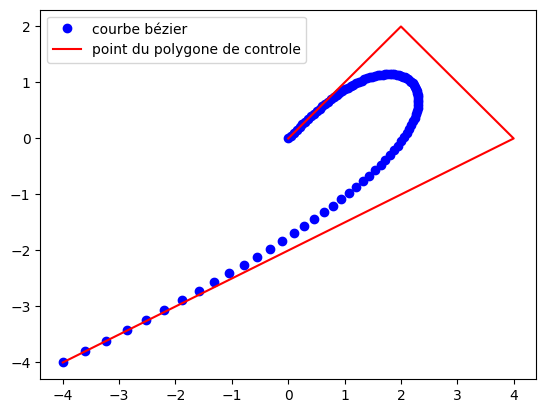

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

#P = [[-4,-4] , [0,0], [1,1] , [2,2] , [3,1], [4,0]]
P = [ [0,0], [1,1] , [2,2] , [3,1], [4,0] , [-4,-4]]

def tracer_courbe_avec_Casteljau(P):
    point_de_controle_x = []
    point_de_controle_y = []
    for i in range(len(P)): # tracer de points du polygone de contrôle
        point_de_controle_x.append(P[i][0])
        point_de_controle_y.append(P[i][1])

    t = np.linspace(0,1,100)    # intervalle t = [0,1] sur 100 points
    x=[]
    y=[]

    for i in range(len(t)):     # tracer de la courbe de bézier
        x.append(Casteljau(P,t[i])[0][0])
        y.append(Casteljau(P,t[i])[0][1])

    #plt.plot(t,courbe,'bo',label="courbe bézier")
    plt.plot(x,y,'bo',label="courbe bézier")
    plt.plot(point_de_controle_x,point_de_controle_y,'r',label="point du polygone de controle")
    plt.legend(loc="upper left")  
    plt.title("")   
    plt.show()

tracer_courbe_avec_Casteljau(P)



## Tracé d'une courbe de Bézier via les polynôme de Berstein


On admet la relation suivante entre les polynômes de la base de Bernstein $B_i ^n$, $i=0,\dots,n$ et la base canonique de $\mathbb{R}_n[x]$, $1,x,x^2,\dots,x^n$.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bernstein.svg'  width="500px">       
    </tr>
</table>

Etant donné un polygone de contrôle ${\bf P}=(P_0,\dots,P_n)$ et un temps $t\in [0,1]$, écrire deux fonctions qui expriment les polynômes $x(t)$ et $y(t)$ dans la base canonique (votre fonction pourra produire un vecteur pour les coefficients de $x$ et un vecteur pour les coefficients de $y$).

Utiliser cette construction pour tracer la courbe paramétrée $\gamma(t)=(x(t),y(t)$ en utilisant l'algorithme de Horner.

Comparer les temps d'exécution du tracé avec la méthode de de Casteljau.

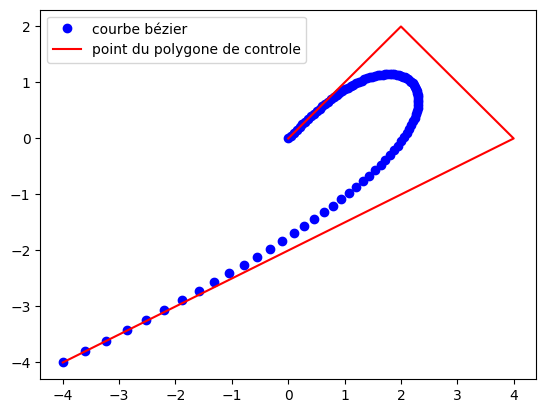

In [3]:
def Bernstein(i,m):   # calcul B_i_m et renvoie les coefficients sous la forme a0 + a1x + ... + anx^n
    B_im = [0]*(m+1)    # initialisation de la liste des coefficient du polynome de Bernstein
    if(i==m):
        i_parmi_m = 1
        B_im[m] = i_parmi_m
    else:
        for l in range(i,m+1,1):
            l_parmi_m = (np.math.factorial(m)/(np.math.factorial(l)*np.math.factorial(m-l)))
            i_parmi_l = (np.math.factorial(l)/(np.math.factorial(i)*np.math.factorial(l-i)))
            B_im[l] = l_parmi_m * i_parmi_l * pow(-1,(l-i))       # calcul du coefficient devant x^l
            #B_im[l] = (np.math.factorial(m)/(np.math.factorial(l)*(np.math.factorial(m)-np.math.factorial(l)))) * (np.math.factorial(l)/(np.math.factorial(i)*(np.math.factorial(l)-np.math.factorial(i))))  * pow(-1,(l-i)) 
    return B_im
#print(Bernstein(3,3))

def multiplication_polynome_par_un_reel(k,P):   # multiplication d'un polynome par un réel k
    for i in range(len(P)):
        P[i] = P[i] * k
    return P
#print(multiplication_polynome_par_un_reel(15,Bernstein(3,3)))

def somme_polynome(P1,P2):  # somme de 2 polynome sous forme de liste
    l1,l2 = len(P1),len(P2)
    Somme_P = []            # variable du resultat de la somme 

    # on traite les 3 différents cas possible en fonction de la longueur de la liste des polynome 
    if(len(P1) == len(P2)):
        for i in range(len(P1)):
            Somme_P.append(P1[i] + P2[i])
    if(len(P1) < len(P2)):
        for i in range(len(P1)):
            Somme_P.append(P1[i] + P2[i])
        for j in range(len(P1),len(P2),1):
            Somme_P.append(P2[j])
    if(len(P1) > len(P2)):
        for i in range(len(P2)):
            Somme_P.append(P1[i] + P2[i])
        for j in range(len(P2),len(P1),1):
            Somme_P.append(P1[j])
    return Somme_P

def eval_t(coef_P , t): # fonction qui evalue le polynome P en t grâce aux coefficient du polynome de la liste P
    S=0
    for i in range(len(coef_P)):
        S = S + coef_P[i]*t**i
    return S

def horner(coef_P,t):
    n=len(coef_P)
    valeur=coef_P[n-1]
    for i in range(n-2,-1,-1):
        valeur=valeur*t+coef_P[i]
    return valeur

def x_t(P):   #construction de x(t)
    x_t = [0] * (len(P)+1)
    for i in range(len(P)):
        x_t = somme_polynome(x_t,multiplication_polynome_par_un_reel(P[i][0],Bernstein(i,len(P)-1)))
    return x_t  

def y_t(P):   #construction de x(t)
    y_t = [0] * (len(P)+1)
    for i in range(len(P)):
        y_t = somme_polynome(y_t,multiplication_polynome_par_un_reel(P[i][1],Bernstein(i,len(P)-1)))
    return y_t 


def tracer_courbe_avec_Bernstein(P):
    t = np.linspace(0,1,100)
    xt = x_t(P)    # x(t)
    yt = y_t(P)    # y(t)
    x_coord = []
    for i in range(len(t)):
        #x_coord.append(eval_t(xt,t[i]))
        x_coord.append(horner(xt,t[i]))
    y_coord = []
    for i in range(len(t)):
        #y_coord.append(eval_t(yt,t[i]))
        y_coord.append(horner(yt,t[i]))

    # pour tracer le polygone de contrôle
    point_de_controle_x = []
    point_de_controle_y = []
    for i in range(len(P)): # tracer de points du polygone de contrôle
        point_de_controle_x.append(P[i][0])
        point_de_controle_y.append(P[i][1])

    plt.plot(x_coord,y_coord,'bo',label="courbe bézier")
    plt.plot(point_de_controle_x,point_de_controle_y,'r',label="point du polygone de controle")
    plt.legend(loc="upper left")  
    plt.title("")   
    plt.show()
    



P = [ [0,0], [1,1] , [2,2] , [3,1], [4,0] , [-4,-4]]
#P = [ [4,4], [0,-10] , [0,14] , [4,0]]
#print(y_t(P)) 
#def x_t(P):

tracer_courbe_avec_Bernstein(P)
    

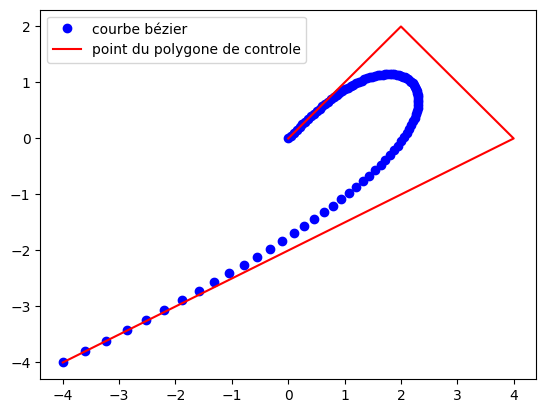

---0.19500041007995605 seconds --- pour la méthode avec Casteljau


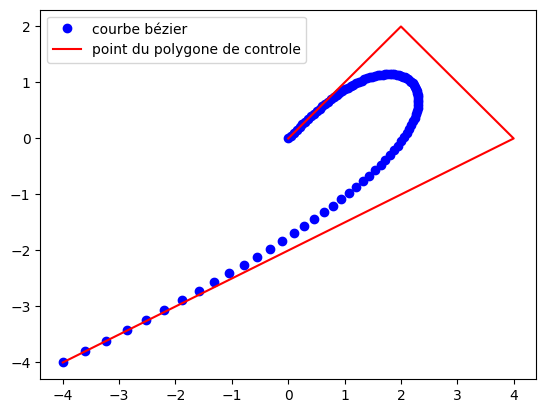

---0.18900012969970703 seconds --- pour la méthode avec les polynomes de Bernstein


In [4]:
# comparaison temps de calcul entre Casteljau et la méthode des polynomes de Bernstein (pour 100 points tracés)

import time

P = [ [0,0], [1,1] , [2,2] , [3,1], [4,0] , [-4,-4]]

start_time = time.time()
tracer_courbe_avec_Casteljau(P)
print("---%s seconds --- pour la méthode avec Casteljau" % (time.time() - start_time))

start_time = time.time()
tracer_courbe_avec_Bernstein(P)
print("---%s seconds --- pour la méthode avec les polynomes de Bernstein" % (time.time() - start_time))

## Fonction B-splines

Ecrire une fonction qui étant donnée un vecteur noeud $\tau=(t_0,\dots, t_m)$ et le choix d'un degré $k$ calcule les fonction B-splines $B_{i,k}$ pour $k=0,\dots,m-k-1$.

Donner des représentations graphiques des fonctions B-splines associées à un noeuds donné

In [ ]:
''' 

def multiplication_entre_polynome(P1,P2):   # multiplication de deux polynomes
    n=(len(P1)-1)+(len(P2)-1)               # degrée maximal du polynome
    multiplication_P = [0] * (n+1)           # variable du resultat de la somme , on initialise une liste de 0 de la taille du plus haut degrès du polynome résultat
    #print(multiplication_P)

    for i in range(len(P1)):
        for j in range(len(P2)):
            degres = i + j                 # degrès de la multiplication des coefficient
            multiplication_P[degres] = multiplication_P[degres] + (P1[i]*P2[j])
                
    return multiplication_P

def w_ij(vecteur_noeud,i,j): #calcul des fonctions poids w_ij en fonction des indices i et j et de x
    if(vecteur_noeud[i]<vecteur_noeud[i+j]):
        w_ij = [ -1 * vecteur_noeud[i]/(vecteur_noeud[i+j] - vecteur_noeud[i])   ,   vecteur_noeud[i+j] - vecteur_noeud[i] ]
    else:
        w_ij = [0,0]
    return w_ij

def inv_w_ij(w_ij):   # calcul de (1-w_ij)
    w_ij = [(-1 * w_ij[0]) + 1  , -1 * w_ij[1]]
    return w_ij



def B_ik(vecteur_noeud,k):      # calcul des fonctions B_splines B_ik de degré k
    m = vecteur_noeud.size - 1
   
    taille_intervalle  = len(np.unique(vecteur_noeud, return_counts=False)) - 1   # renvoie le nombre d'intervalle du tableau de construction des fonctions B_ik , np.unique renvoie le tableau des éléments sans répétition des éléments redondants

    #B_ik = [0] * (k+1)          # les fonctions B_ik sont de degrès au plus k donc elles ont k+1 coefficient (ao,a1,...ak) ,
    B_ik = [[[0 for _ in range(k+1)] for _ in range(taille_intervalle)] for _ in range(len(vecteur_noeud) -1)]                    # les B_ik sont des listes de liste , représentant chaque valeur des B_ik avec ces coefficiants sous forme canonique (ao,a1,...ak) sur chaque intervalle 
    # exemple B[1][1] représente B_1k sur le 2e intervalles

    liste_B_ik = []             # m - k fonctions B-splines
    
    for degree in range(k+1):
        if(degree == 0):
            for j in range(len(vecteur_noeud) - 1): #nombre fonction B_i0 B-spline de degré 0
                z = 0
                for l in range(taille_intervalle):
                    while(vecteur_noeud[z] == vecteur_noeud[z+1]):
                            B_ik[j][l][0] = 0       # le coefficient du premier element B_00 sur le premier intervalle vaut 0 
                            z=z+1 

                    if(vecteur_noeud[z] != vecteur_noeud[z+1]):
                        if(z == j):
                            #print(f"spline{j} intervalle{l}")
                            B_ik[j][l][0] = 1 
                        z = z+1 
            print(f"B-spline degré 0 = {B_ik}")
        
                        
        else:
            for j in range(len(vecteur_noeud) - degree - 1):
                for l in range(taille_intervalle):
                    B_ik[j][l]  = somme_polynome(multiplication_entre_polynome(B_ik[j][l],w_ij(vecteur_noeud,j,degree))   ,  multiplication_entre_polynome(B_ik[j+1][l],(inv_w_ij(w_ij(vecteur_noeud,j+1,degree)))) )   
            print(f"B-spline degré {degree} = {B_ik}") 
            #del B_ik[-1]
            
    return B_ik

def tracer_courbe_B_Spline(vecteur_noeud , k ,P):

    taille_intervalle  = len(np.unique(vecteur_noeud, return_counts=False)) - 1
    m = vecteur_noeud.size - 1
    B_spline = B_ik(vecteur_noeud , k)
    t = np.linspace(0,1,100)

    x_t = []
    for i in range(len(t)):
        somme = 0
        for j in range(m - k -1):
            for l in range(taille_intervalle):
                somme = somme + eval_t(B_spline[j][l],t[i]) * P[j][0]
        if(somme < 100):
            x_t.append(somme)
    
    y_t = []
    for i in range(len(t)):
        somme = 0
        for j in range(m - k -1):
            for l in range(taille_intervalle):
                somme = somme + eval_t(B_spline[j][l],t[i]) * P[j][1]
        if(somme < 100):            
            y_t.append(somme)

    # pour tracer le polygone de contrôle
    point_de_controle_x = []
    point_de_controle_y = []
    for i in range(len(P)): # tracer de points du polygone de contrôle
        point_de_controle_x.append(P[i][0])
        point_de_controle_y.append(P[i][1])

    plt.plot(x_t,y_t,'bo',label="Tracer avec courbe B-Spline")
    plt.plot(point_de_controle_x,point_de_controle_y,'r',label="point du polygone de controle")
    plt.legend(loc="upper left")  
    plt.title("")   
    plt.show()
    


P = [[0,1], [2,3] , [4,1] , [6,3]]        
k = 2   #degré des fonctions B-splines
#vecteur_noeud = np.array([0,1,2,2,4])
#vecteur_noeud = np.array([0,0,0,0,1,1,1,1])
vecteur_noeud = np.array([0,0,0,0.5,1,1,1])

tracer_courbe_B_Spline(vecteur_noeud,k,P)

'''

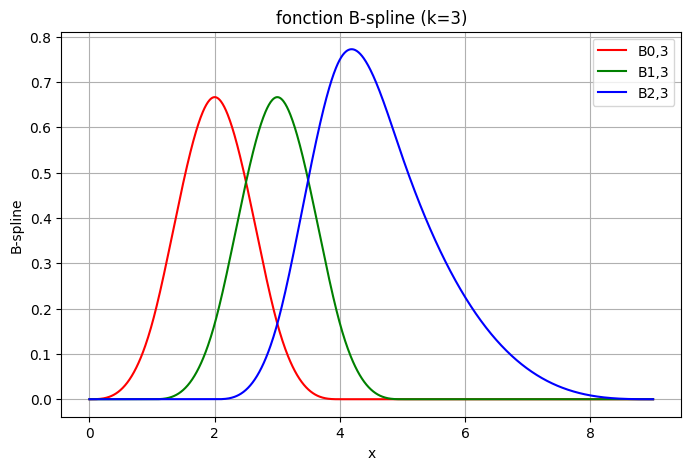

In [8]:
def bspline(tau, k, i, x):
    if k == 0:
        if tau[i] <= x < tau[i+1]:
            return 1
        return 0
    else:
        basis1 = 0
        basis2 = 0
        if tau[i+k] != tau[i]:
            basis1 = (x - tau[i]) / (tau[i+k] - tau[i]) * bspline(tau, k-1, i, x)
        if tau[i+k+1] != tau[i+1]:
            basis2 = (tau[i+k+1] - x) / (tau[i+k+1] - tau[i+1]) * bspline(tau, k-1, i+1, x)
        return basis1 + basis2

def bspline_fonction(tau, k):
    x = np.linspace(tau[0], tau[-1], 1000)
    basis_functions = np.zeros((len(tau)-k-1, len(x)))

    for i in range(len(tau)-k-1):
        for j in range(len(x)):
            basis_functions[i, j] = bspline(tau, k, i, x[j])

    plt.figure(figsize=(8, 5))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'][:len(tau)-k-1]  # Choix des couleurs des fonctions
    for i in range(len(tau)-k-1):
        plt.plot(x, basis_functions[i], color=colors[i], label=f'B{i},{k}')

    plt.xlabel('x')
    plt.ylabel('B-spline')
    plt.title(f'fonction B-spline (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

tau = [0, 1, 2, 3, 4, 5, 9]  # Vecteur nœud
k = 3  # Degré des B-splines

bspline_fonction(tau, k)